In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, InputLayer
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, normalize
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
# tf.__version__

In [3]:
train_df = pd.read_csv(os.path.join('data', 'unionTrain.csv'))
test_df = pd.read_csv(os.path.join('data', 'unionTest.csv'))
print(f"Length Train: {len(train_df)}")
print(f"Length Test: {len(test_df)}")

Length Train: 107
Length Test: 19


In [4]:
print(len(train_df))
train_df.head()

107


,sequence_id,0_0X,0_0Y,0_1X,0_1Y,0_2X,0_2Y,0_3X,0_3Y,0_4X,...,853_20Y,853_21X,853_21Y,853_22X,853_22Y,853_23X,853_23Y,853_24X,853_24Y,Severity
0,128.778580,203.818390,137.074432,213.271698,120.394463,218.456604,128.786789,214.281204,138.171570,209.073471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,0.000000,0.000000,0.000000,2.578170,21.342966,29.684607,82.876892,53.714298,149.624344,0.000000,...,71.378502,236.188980,71.378502,236.188980,71.378502,236.188980,71.378502,236.188980,71.378502,2
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,125.631256,222.626373,125.631256,222.626373,125.631256,222.626373,125.631256,222.626373,125.631256,2
4,103.680695,126.701424,108.963158,120.373978,85.994064,122.495720,96.498444,129.821487,105.855408,114.185593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [12]:
train_df['sequence_id'].head(10).to_list()

[128.77857971191406,
 0.0,
 0.0,
 0.0,
 103.68069458007812,
 0.0,
 22.42952346801757,
 0.0,
 0.0,
 0.0]

In [7]:
X_train, y_train = train_df.drop(['Severity', 'sequence_id'], axis=1), train_df['Severity']
X_test, y_test = test_df.drop(['Severity', 'sequence_id'], axis=1), test_df['Severity']

In [14]:
def modify_X(x):
    if type(x).__module__ != np.__name__:
        result = x.to_numpy()
    else:
        result = x.copy()
    result = result.reshape(-1, 854, 2*25)
    return result
X_train_modified = modify_X(X_train)
X_train_modified.shape

(107, 854, 50)

Index: 0, Severity: 1


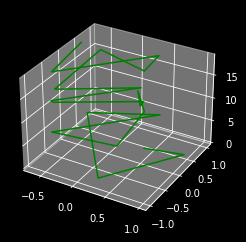

In [15]:
def plot_sample_1():
    for i in range(1,5):
        print(f"Index: {i}, Severity: {y_train[i]}")
        for j in range(25):
            sample = X_train_modified[i,j,:]
            plt.plot(sample)
            plt.show()

def plot_sample_2():
    for i in range(7):
        print(f"Index: {i}, Severity: {y_train[i]}")
        for j in range(0, 2, 2):
            sample_xx = X_train_modified[i,:,j]
            sample_yy = X_train_modified[i,:,j+1]
            plt.plot(sample_xx)
            plt.plot(sample_yy)
            plt.show()
            
def plot_sample_3():
    for i in range(1):
        print(f"Index: {i}, Severity: {y_train[i]}")
        for j in range(0, 2, 2):
            LENGTH = 20
            sample_xx = X_train_modified[i,:,j][:LENGTH]
            sample_yy = X_train_modified[i,:,j+1][:LENGTH]
            # print(sample_xx.shape)
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            zline = np.arange(0, min(sample_xx.shape[0], LENGTH), 1)
            xline = np.sin(sample_xx)
            yline = np.cos(sample_yy)
            ax.plot3D(xline, yline, zline, 'green')

        
# plot_sample_1()
# plot_sample_2()
plot_sample_3()